In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('microchip_tests.txt', header = None, names = ('x1', 'x2', 'released'))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
x1          118 non-null float64
x2          118 non-null float64
released    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [3]:
m = len(data['x1'])

data['x1_2'] = data['x1'] ** 2
data['x2_2'] = data['x2'] ** 2
data['x1x2'] = data['x1'] * data['x2']
data['x1_3'] = data['x1'] ** 3
data['x2_3'] = data['x2'] ** 3
data['x1_2x2'] = (data['x1'] ** 2) * data['x2']
data['x1x2_2'] = data['x1'] * (data['x2'] ** 2)

data.head()

,x1,x2,released,x1_2,x2_2,x1x2,x1_3,x2_3,x1_2x2,x1x2_2
0,0.051267,0.69956,1,0.002628,0.489384,0.035864,0.000135,0.342354,0.001839,0.025089
1,-0.092742,0.68494,1,0.008601,0.469143,-0.063523,-0.000798,0.321335,0.005891,-0.043509
2,-0.213710,0.69225,1,0.045672,0.479210,-0.147941,-0.009761,0.331733,0.031616,-0.102412
3,-0.375000,0.50219,1,0.140625,0.252195,-0.188321,-0.052734,0.126650,0.070620,-0.094573
4,-0.513250,0.46564,1,0.263426,0.216821,-0.238990,-0.135203,0.100960,0.122661,-0.111283


In [4]:
n = len(data.columns) - 1

X = data.drop(['released'], axis=1).to_numpy().reshape((m, n))
y = data['released'].to_numpy().reshape((m, 1))

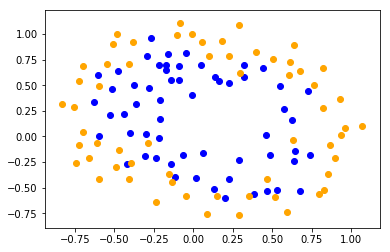

In [5]:
plt.scatter(X[np.ravel(y) == 1, 0], X[np.ravel(y) == 1, 1], c='blue')
plt.scatter(X[np.ravel(y) == 0, 0], X[np.ravel(y) == 0, 1], c='orange')

In [6]:
ones = np.ones((m, 1))

X = np.concatenate((ones, X), axis = 1)

X.shape

(118, 10)

In [7]:
def train_test_split(X, y, s = 0.3):
    assert(X.shape[0] == y.shape[0])
    m = X.shape[0]
    val = int(m - m * s)
    
    indices = np.arange(m)
    np.random.shuffle(indices)

    A = X[indices]
    B = y[indices]
    
    X_train = A[:val + 1]
    y_train = B[:val + 1]
    
    X_test = A[val + 1:]
    y_test = B[val + 1:]
    
    return X_train, y_train, X_test, y_test

In [8]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [9]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [10]:
def hyp(theta, X):
    h = sigmoid(X @ theta)
    
    return h

In [11]:
def cost(theta, X, y, m, l):
    J = -1 * np.sum(y.T @ np.log(hyp(theta, X)) + (1 - y).T @ np.log(1 - hyp(theta, X))) / m
    J += (l / (2 * m)) * np.sum(np.square(theta[1:]))
    return J

In [12]:
def train_model(theta, X, y, m, l = 0.006, alpha = 0.08):
    J = []
    cost0 = cost(theta, X, y, m, l)
    J.append(cost0)
    for i in range(100000):
        delta = X.T @ (hyp(theta, X) - y) / m
        temp = theta
        theta = theta - alpha * delta
        theta[1:] -= (alpha / m) * l * temp[1:]
        
        cost1 = cost(theta, X, y, m, l)
        J.append(cost1)
        if cost1 == 0 or cost1 > cost0:
            print(i)
            break
        cost0 = cost1
    
    return J, theta

In [13]:
def pred(theta, X):
    h = hyp(theta, X)
    h[h >= 0.5] = 1.0
    h[h < 0.5] = 0.0
    
    return h

In [14]:
theta = np.ones((X.shape[1], 1))
m = X_train.shape[0]
J, theta = train_model(theta, X_train, y_train, m)

theta

array([[  5.36247892],
       [  2.42606843],
       [  3.96828444],
       [-12.88158444],
       [-11.37423742],
       [ -7.81965573],
       [  1.97057616],
       [ -1.33409301],
       [  2.26505206],
       [ -0.67717563]])

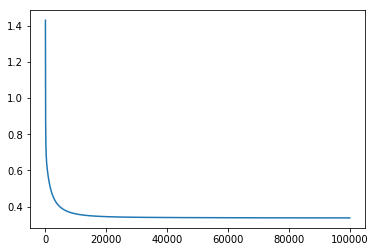

In [15]:
plt.plot(J)

In [16]:
y_pred = pred(theta, X_test)
accuracy = 0
n = X_test.shape[0]

for i in range(n):
    if y_pred[i] == y_test[i]:
        accuracy += 1

accuracy /= n
accuracy

0.8

In [17]:
xx = []
yy = []

xxxxx = np.arange(-1.0, 1.2, 0.01)

for i in xxxxx:
    for j in xxxxx:
        xx.append([i, j])
        x_ = np.array([1.0, i, j, i ** 2, j ** 2, i * j, i ** 3, j ** 3, (i ** 2) * j, (i * j) ** 2])
        y_ = sigmoid(x_ @ theta)
        if y_ >= 0.5:
            yy.append(1.0)
        elif y_ < 0.5:
            yy.append(0.0)

xx = np.array(xx)
yy = np.array(yy)

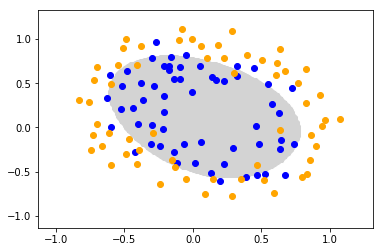

In [18]:
plt.scatter(xx[np.ravel(yy) == 1, 0], xx[np.ravel(yy) == 1, 1], c='lightgrey')
plt.scatter(xx[np.ravel(yy) == 0, 0], xx[np.ravel(yy) == 0, 1], c='white')
plt.scatter(X[np.ravel(y) == 1, 1], X[np.ravel(y) == 1, 2], c='blue')
plt.scatter(X[np.ravel(y) == 0, 1], X[np.ravel(y) == 0, 2], c='orange')